<a href="https://colab.research.google.com/github/usintec/BitcoinStockMarket/blob/master/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install needed packages (optional in Colab)

In [1]:
!pip install --quiet seaborn statsmodels

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
url = 'https://raw.githubusercontent.com/usintec/BitcoinStockMarket/refs/heads/master/bitcoin_ngx_with_regulatory_shock_updated.csv'
df = pd.read_csv(url)

df.head()

,Date,BTC_Price,BTC_Volume,BTC_Volatility,NGX_ASI,NGX_Volatility,Regulatory_shock
0,1/31/2015,6493.428306,2207479.262,0.060387,25287.30958,0.018721,0
1,2/28/2015,6716.899704,2885263.559,0.080655,25064.49335,0.010445,0
2,3/31/2015,8512.276780,3504987.279,0.047825,25535.33164,0.003936,0
3,4/30/2015,12058.336490,3865755.194,0.058034,25164.77632,0.022035,0
4,5/31/2015,12090.029740,1799703.593,0.063803,25390.83345,0.012436,0


# Drop rows with missing values

In [ ]:

df = df[['BTC_Volatility', 'NGX_Volatility', 'Regulatory_shock']].dropna()

STEP 3: Create interaction term

In [8]:
df['Interaction'] = df['BTC_Volatility'] * df['Regulatory_shock']

STEP 4: Fit the moderated regression model

In [10]:
model = smf.ols('NGX_Volatility ~ BTC_Volatility + Regulatory_shock + Interaction', data=df).fit()

Display regression summary

In [11]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         NGX_Volatility   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.07045
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.976
Time:                        08:54:23   Log-Likelihood:                 394.05
No. Observations:                 120   AIC:                            -780.1
Df Residuals:                     116   BIC:                            -769.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0181      0.004  

STEP 5: Interpretation of β3 (Interaction Term)

In [12]:
beta3 = model.params['Interaction']
p_value = model.pvalues['Interaction']
alpha = 0.05

In [13]:
print("\n--- Moderation Effect Interpretation ---")
print(f"β3 (Interaction Term) = {beta3:.4f}")
print(f"p-value = {p_value:.4f}")


--- Moderation Effect Interpretation ---
β3 (Interaction Term) = -0.0339
p-value = 0.6848


In [14]:
if p_value < alpha:
    direction = "weakens" if beta3 < 0 else "amplifies"
    print(f"✅ Significant moderation detected: Regulation {direction} the spillover effect of BTC on NGX.")
else:
    print("❌ No significant moderation: Regulation does not alter the BTC→NGX relationship.")

❌ No significant moderation: Regulation does not alter the BTC→NGX relationship.


<Figure size 1000x600 with 0 Axes>

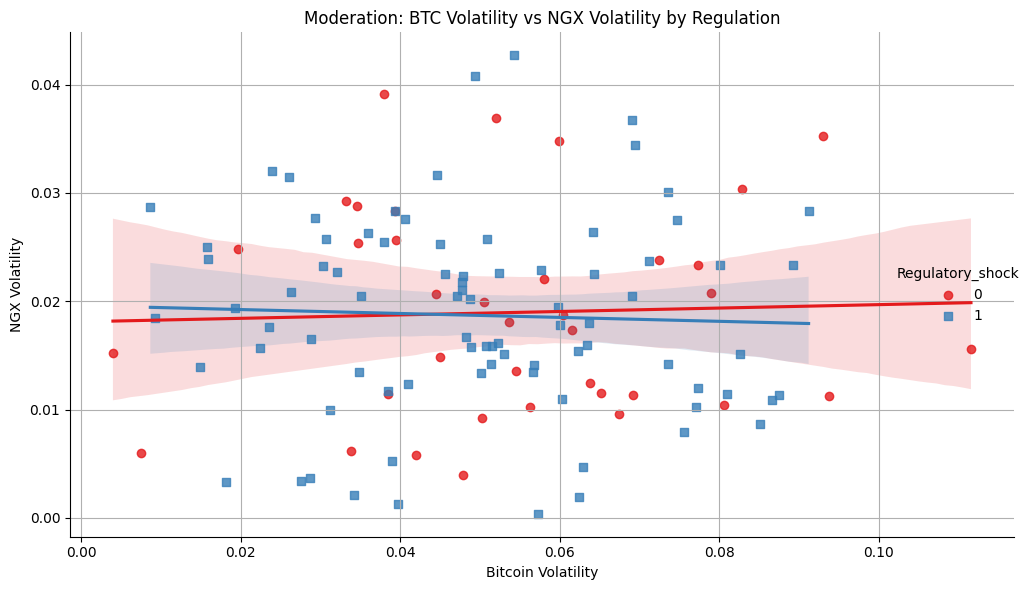

In [16]:
# STEP 6: Visualization
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='BTC_Volatility', y='NGX_Volatility', hue='Regulatory_shock',
           palette='Set1', height=6, aspect=1.5, markers=["o", "s"])
plt.title("Moderation: BTC Volatility vs NGX Volatility by Regulation")
plt.xlabel("Bitcoin Volatility")
plt.ylabel("NGX Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()